# Episodic RL & Uncertainty: Experiment 1

Jonathan Nicholas and Daphna Shohamy

06/29/2018

*All analysis code is included at the end of the notebook*

---


## How does reward uncertainty affect the use of episodes in decision making?
### Background
It is well established that uncertainty arbitrates between the use of model-based and model-free control strategies (Daw et al., 2005). While much focus has been placed on when these two systems compete for control, another line of work has suggested that a third control strategy relying on one-shot experiences may also vie for decision making power. An early computational study demonstrated that in the face of computational noise, such as in the beginning of a task or when faced with unreliable samples, using individual episodes to control decision making behavior is a better strategy than relying on incremental methods (Lengyel & Dayan, 2007). Furthermore, recent computational models have demonstrated that optimal decision making policies are learned faster by relying on one-shot experiences before incremental strategies take over, and that these hybrid models outperform purely incremental controllers in a variety of paradigms (Blundell et al., 2016).

It has only recently been suggested that the brain might engage in episodic control of decision making (Gershman & Daw, 2017; Bhui, 2018) and it is currently unknown whether a neurobiological episodic controller might dominate choices in conditions predicted by theory, particularly in cases when incremental systems are unable to converge upon reliable estimates of the average reward (model-free) or generative parameters (model-based) in the environment. While it has been found that reward uncertainty increases episodic encoding (Gerraty et al., 2018 In Prep.) and that episodic and incremental control may compete for resources dedicated to reward processing (Wimmer et al., 2016), no work has explored when individual episodes are the preferred substrate for decisions.

A key determination of whether to use episodic information or not may be the degree of uncertainty that remains in an incremental system. If predictions from either incremental system are poorly fit to the environment, retrieving a highly rewarding episode instead should lead to greater long-term reward.


#### Hypotheses
1) People will rely on individual episodes when incremental control poorly predicts reward outcomes (e.g. when the mapping between choice and outcome is uncertain)

2) Tracking the degree of uncertainty in an incremental controller's estimate is what arbitrates the use of episodic control.

---

### Methods
According to the above, episodic control should be promoted when incremental strategies are disadvantaged. Thus, the goal of this experiment is to have participants make decisions between experienced episodes and options with high/low incremental uncertainty.

##### Participants
63 participants were recruited from Amazon Mechanical Turk. Of these, 4 navigated away from the browser window presenting the experiment greater than 20 times and 6 responded to fewer than 60% of trials, making the final N=53. Participants were paid a proportion of their earnings following successful completion of the experiment (earnings*0.001).

##### Experimental Design
<img src="eprl_variability_mturk_design.jpg" width="700">
<center><h4>Figure 1: Experimental Design </h4></center>

###### Training
Participants first completed a training phase where they were required to choose between two images. Trials were of two types (intermixed). The first type consisted of choices between two circles, one blue and one orange. Participants were informed that one of these options may be more reliable than the other. Outcomes for each circle were sampled from normal distributions where:

    Reliable ~ Normal(0.6, 0.05)
    Unreliable ~ Normal(0.6, 0.2)
    
Such that either option had an identical average of 0.6 with differing variances. Outcomes were truncated at 0 and 1.2 on these distributions. The second type of trial consisted of choices between two objects. Participants were informed that whenever they saw a repeated object, that object would be worth the same amount of money. Each chosen object was repeated, at most, one time. Object outcomes were discrete, with either a high or low value:

    High = 1.2
    Low = 0
    
Such that the average outcome of choosing a new object was equal to choosing either circle (0.6).  The figure immediately below is a visual depiction of these outcome distributions. 

Lastly, each participant completed 300 training trials, where 60% were choices between objects and 40% were choices between circles. On each object trial, there was a 30% chance of seeing an old object.These proportions were arrived at through trial and error in order to maximize the number repeated objects seen during the test phase.

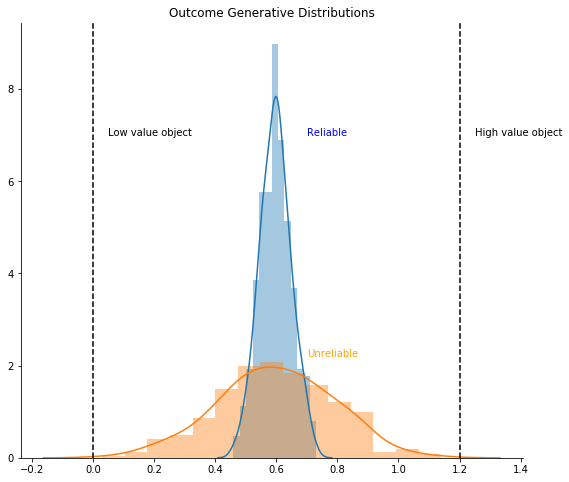

In [14]:
plt.figure(figsize=(9, 8))
plot_generative(nTimepoints=300)

###### Testing

Following completion of the training phase, participants were required to choose between one of the circles and an object. There was no feedback about choice outcomes during this phase. Importantly, 50% of objects were previously seen only once during the training phase, and were shown again no more than once during the test phase. Participants completed 150 test trials, with an average of 75 previously seen objects.

Importantly, the objects' values were set during training such that it would always be optimal to choose a previously seen high valued object, and to ignore a previously seen low valued object.

---

### Results

##### Prediction
If incremental and episodic retrieval strategies compete for control and are arbitrated by the degree of uncertainty in the incremental controller, then we predict that previously seen objects should be chosen more frequently when participants are faced with a decision between an old object and the unreliable circle compared to a decision between an old object and the reliable circle. Furthermore, high valued old objects should be chosen more frequently than low valued old objects in both conditions.

### No difference in episodic choice between reliability conditions

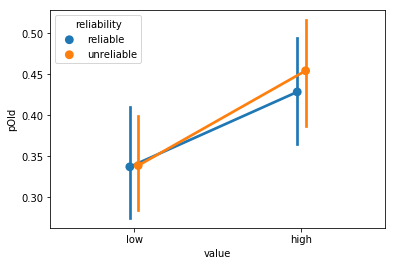

In [11]:
int_data, exclude_pids = loadData(dType="interaction")
exclude_pids = map(int,exclude_pids)
data = loadData(dType="experiment")[0]
agg_data = aggregateTestData(data=data, exclude_pids=exclude_pids)
sns.pointplot(x='value',y='pOld',hue='reliability',data=agg_data,order=['low','high'],dodge=True)

plt.show()

This figure plots the group-level average proportion of choosing an old object during the test phase as a function of object value and circle stimulus reliability with 95% confidence intervals demonstrating measurement uncertainty.

The first thing to notice is that most subjects are failing to recall objects from the training phase, even when the objects are high valued.

Second, the variability in recollection is quite high, as demonstrated by width of confidence intervals around each average. This is perhaps unsurprising due to general noisiness in Mturk data collection, although N=53 here.

Third, as expected, participants tend to choose high valued objects more often than low valued objects (although not by much)

Lastly, and **very cautiously**, we see that the choice averages are in the predicted direction for the high-valued case.

---

### Individuals less likely to choose a low-valued old object are better performers

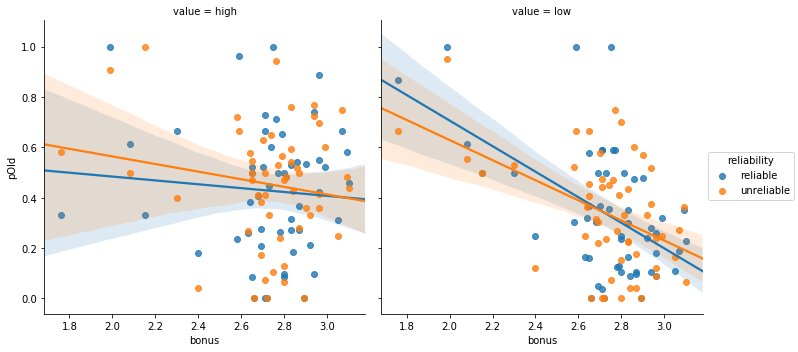

In [31]:
sns.lmplot(x='bonus',y='pOld',hue='reliability',col='value',data=agg_data)

This figure plots the relationship between a participant's overall performance (their bonus earnings) and the proportion of old objects chosen as a function of circle reliability and object value during the test phase.

*I was primarily interested in seeing whether higher performing individuals demonstrated greater retrieval for old objects in the unreliable condition, but this does not appear to be the case.*

Unsurprisingly, choosing fewer options that yield $0 results in greater performance. Determining whether this is due to recollection of the low-valued object or not is tricky. It is possible that recalling a low valued object leads individuals to avoid choosing that object. This would suggest that, irrespective of the incremental option, participants may better remember objects that were clearly poor options. On the other hand, this relationship is, at least to some extent, guaranteed by the task design.

---

## Interim conclusion

**The reliability of the incremental stimuli does not appear to affect episodic choice in the current paradigm.**

Before thinking about why, let's verify that participants learned the way we predicted during the training phase. We expect participants to choose the reliable option more frequently and to recall high objects more frequently than low objects.

--- 

### During training, participants tend to choose the reliable option

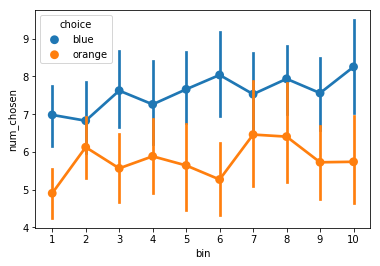

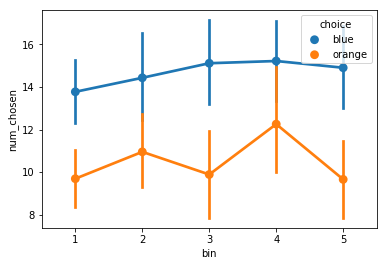

In [19]:
# Trials split into 10 bins
relOut = binChoices(data=data,n_bins=10,trialType='reliability')
sns.pointplot(x="bin",y="num_chosen",hue="choice",data=relOut)

# Trials split into 5 bins
plt.figure()
relOut = binChoices(data=data,n_bins=5,trialType='reliability')
sns.pointplot(x="bin",y="num_chosen",hue="choice",data=relOut)

plt.show()

These figures plot the frequency of choosing the reliable (here blue) and unreliable (here orange) options during the training phase. Trials are split into 10 and 5 bins respectively. We see that participants tend to choose the reliable option more frequently throughout the task, with a slight impact of experience.

---

### During training, participants choose more old objects in the first half

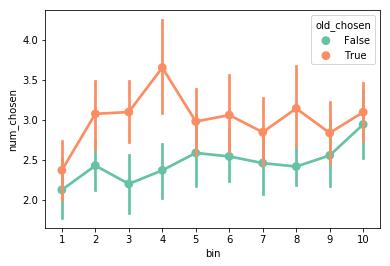

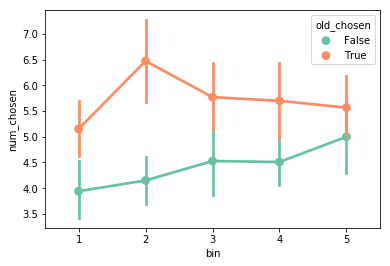

In [25]:
# Trials split into 10 bins
objOut = binChoices(data=data,n_bins=10,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

# Trials split into 5 bins
plt.figure()
objOut = binChoices(data=data,n_bins=5,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

plt.show()

These figures plot the frequency of choosing an old object during the training phase. Trials are split into 10 and 5 bins respectively. Note that old objects are not presented during the first 10 trials of the experiment and there is a 30% chance of seeing an old object on an object trial.

Participants peak in general object recollection after 120 trials.

### During training, participants generally choose more high valued old objects

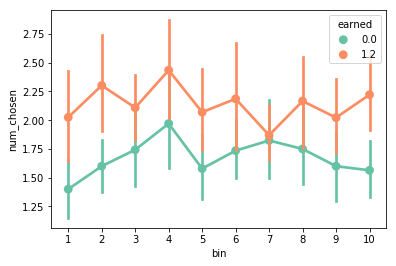

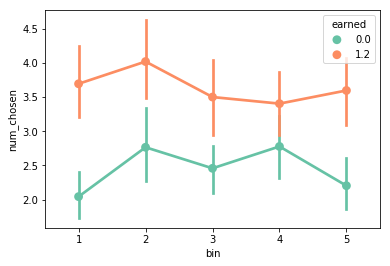

In [30]:
# Trials split into 10 bins
objOut = binChoices(data=data,n_bins=10,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")

# Trials split into 5 bins
plt.figure()
objOut = binChoices(data=data,n_bins=5,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")
plt.show()


---
## Conclusions

1) During training, participants choose the reliable stimulus more frequently and choose high-valued old objects more frequently
- Reliable stimulus is chosen more often practically from the start
- Object memory peaks during the first 120 trials

2) During testing, participants are slightly more likely to choose high-valued old objects, but there is no effect of reliability
- Participant variability is large and averages are in the predicted direction (interpret with caution)
- Better performers tend to avoid low-valued old objects 



---
## Future Directions and Ideas

#### Analyses
1) I think it would be interesting to dig into whether high-value objects presented earlier in the training phase:
- Are more likely to be recalled at test
- Interact with reliability

#### Experimental Design
1) Allow losses by shifting distribution means? There is (weak) evidence of an avoidance strategy in this task

2) Fewer trials? It might be difficult to have enough old (high/low) objects during the test phase without a long train phase, though

3) More strict exclusion criteria? I am being fairly liberal right now (leaving the browser >20 times or >60% response), but 10/63 participants are still being excluded.

4) Run more participants? We expect confidence intervals to shrink with more participants. If this effect is quite small, then we are potentially underpowered. I think it's worth reassessing the paradigm at this stage, though.


---

###### All functions used to generate the above plots are below

In [28]:
# Importing packages
%matplotlib inline
from __future__ import division
import warnings, os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_generative(nTimepoints):
    reliableDist = np.round_(np.random.normal(0.6,0.05,nTimepoints),decimals=2)
    unreliableDist = np.round_(np.random.normal(0.6,0.2,nTimepoints),decimals=2)

    sns.distplot(reliableDist)
    sns.despine()
    plt.text(0.7,7,'Reliable',color='blue')
    sns.distplot(unreliableDist)
    plt.text(0.7,2.2,'Unreliable',color='orange')
    plt.plot([0,0],[0,10],'k--')
    plt.text(0.05,7,'Low value object',color='black')
    plt.plot([1.2,1.2],[0,10],'k--')
    plt.text(1.25,7,'High value object',color='black')
    plt.title('Outcome Generative Distributions')
    
def loadData(dType=None,dataDir="/Users/jonathan/shohamylab/jspych-exps/data",fileType="stateData"):
	data, exclude_pids = [], [] 
	dataFiles = [d for d in os.listdir(dataDir) if dType in d]
	for f in dataFiles:
		subData = pd.read_csv(os.path.join(dataDir,f))
		if dType == "interaction":
			if len(subData[subData.event == 'blur']) >= 20:
				exclude_pids.append(f.split('_')[0])
			subData['subjectID'] = [f.split('_')[0]] * len(subData)
		elif dType == "experiment":
			bonus = float(f.split('_')[2].replace('bonus',''))
			subData['bonus'] = [bonus] * len(subData)
		data.append(subData)
	data = pd.concat(data,ignore_index=True)
	return data, exclude_pids


def aggregateTestData(data=None, exclude_pids=None):
    
    pids = data.subjectID.unique()

    dOut = {'reliability':[],'value':[],'pOld':[],'pid':[],'bonus':[]}
    for pid in pids:

        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        test_data = data[(data.test_part == 'test') & (data.subjectID == pid)]

        bonus = test_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response']
        cleaned_test = test_data[test_data.choice != 'no_response']

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        old_test = cleaned_test[cleaned_test.old_trial == True]
        old_chosen = old_test[old_test.choice == 'object']

        if proportionResponse >= 0.6 and pid not in exclude_pids:

            colors = ['blue','orange']
            values = ['1.20','0.00']

            for c in colors:
                for v in values:
                    nTotal = len(old_test[(old_test.deck_type == c) & (old_test.old_value == v)])
                    nChosen = len(old_chosen[(old_chosen.deck_type == c) & (old_chosen.old_value == v)])

                    pOld = nChosen/nTotal

                    if c == 'blue':
                        rel = 'reliable'
                    else:
                        rel = 'unreliable'

                    if v == '1.20':
                        val = 'high'
                    else:
                        val = 'low'

                    dOut['reliability'].append(rel)
                    dOut['value'].append(val)
                    dOut['pOld'].append(pOld)
                    dOut['pid'].append(pid)
                    dOut['bonus'].append(bonus)

    dOut = pd.DataFrame.from_dict(dOut)
    return dOut

def binChoices(data=None, n_bins=None, trialType=None):
    
    pids = data.subjectID.unique()
    
    relOut = []
    for pid in pids:

        test_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]

        bonus = train_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response'].reset_index()
        cleaned_test = test_data[test_data.choice != 'no_response'].reset_index()

        cleaned_train.loc[cleaned_train['choice'].str.contains('object'), 'choice'] = 'object'

        currBin = 0
        binWidth = int(len(cleaned_train)/n_bins)
        bins = []
        for i_row, row in cleaned_train.iterrows():
            if i_row % binWidth == 0:
                if currBin != n_bins:
                    currBin+=1

            bins.append(currBin)
        cleaned_train['bin'] = bins

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        if proportionResponse >= 0.6 and pid not in exclude_pids:
            if trialType == "reliability":
                rel_chosen = cleaned_train[cleaned_train.choice != "object"].groupby(['bin','choice']).size().reset_index(name="num_chosen")
            elif trialType == "object":
                rel_chosen = cleaned_train[(cleaned_train.choice == "object") &
                                           (cleaned_train.old_trial == True)].groupby(['bin','earned','old_chosen']).size().reset_index(name="num_chosen")
            rel_chosen['pid'] = [pid] * len(rel_chosen)
            relOut.append(rel_chosen)

    relOut = pd.concat(relOut)
    relOut['earned'] = relOut['earned'].convert_objects(convert_numeric=True)
    return relOut